In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.table as at
import astropy.units as u

In [2]:
tbl = at.QTable.read('data/hat-p-20.fits')

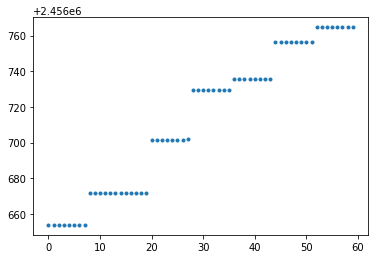

In [3]:
i = 5
plt.plot(range(tbl['BJD'].shape[0]),tbl['BJD'],'.')
plt.show()

In [4]:
print(tbl.columns)

<TableColumns names=('wavelength','flux','flux_err','mask','BJD')>


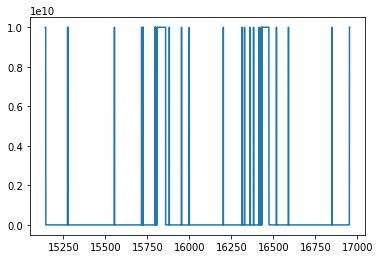

NameError: name 'flux_err' is not defined

In [5]:
plt.plot(tbl['wavelength'][20],tbl['flux_err'][20])
plt.show()
print(bin(flux_err[0]))

In [ ]:
plt.plot(tbl['wavelength'][i],tbl['flux'][i])
plt.show()

In [ ]:
plt.plot(tbl['wavelength'][i],tbl['mask'][i])
plt.show()

In [ ]:
flux = (np.array(tbl['flux'][i]))
lamb = (np.array(tbl['wavelength'][i]/u.Angstrom))
mask = np.array(tbl['mask'][i],dtype=int)
errr = np.array(tbl['flux_err'][i])

In [ ]:
plt.plot(lamb,mask,color='red',alpha=0.4)
plt.plot(lamb,(mask-1)*-1, color='blue',alpha=0.4)
plt.show()

plt.plot(lamb,np.multiply(flux,mask),color='red',alpha=0.4)
plt.plot(lamb,np.multiply(flux,(mask-1)*-1), color='blue',alpha=0.4)
plt.show()

In [6]:
import scipy.signal as signal
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
#     print(normal_cutoff)
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

In [7]:
# Filter requirements.
order  = 6
fs     = 100.0       # sample rate, Hz
cutoff = 1. # desired cutoff frequency of the filter, Hz

low_data  = butter_lowpass_filter(flux, cutoff, fs, order)

adjusted_data = flux/low_data

plt.plot(lamb[(lamb < 15450) * (lamb > 15300)],np.multiply(adjusted_data[(lamb < 15450) * (lamb > 15300)],mask[(lamb < 15450) * (lamb > 15300)])     ,color='blue',alpha=0.5)
plt.plot(lamb[(lamb < 15450) * (lamb > 15300)],np.multiply(adjusted_data[(lamb < 15450) * (lamb > 15300)],mask[(lamb < 15450) * (lamb > 15300)]-1)*-1,color='red' ,alpha=0.5)
plt.legend(['masked','unmasked'])
plt.xlabel('wavelength (A)')
plt.ylabel('flux')
plt.title('ratio of data w/ cutoff {} Hz'.format(cutoff))
plt.show()

plt.plot(lamb[(lamb < 15450) * (lamb > 15300)],low_data[(lamb < 15450) * (lamb > 15300)],color='blue',alpha=0.5)
plt.plot(lamb[(lamb < 15450) * (lamb > 15300)],flux[(lamb < 15450) * (lamb > 15300)],color='red',alpha=0.5)
plt.legend(['filtered','unfiltered'])
plt.xlabel('wavelength (A)')
plt.ylabel('flux')
plt.title('low filtered data w/ cutoff {} Hz'.format(cutoff))
plt.show()

NameError: name 'flux' is not defined

In [ ]:
plt.plot(lamb[(lamb < 15450) * (lamb > 15300)],np.multiply(errr[(lamb < 15450) * (lamb > 15300)],mask[(lamb < 15450) * (lamb > 15300)])     ,color='blue',alpha=0.5)
plt.plot(lamb[(lamb < 15450) * (lamb > 15300)],np.multiply(errr[(lamb < 15450) * (lamb > 15300)],mask[(lamb < 15450) * (lamb > 15300)]-1)*-1,color='red' ,alpha=0.5)
plt.legend(['masked','unmasked'])
plt.xlabel('wavelength (A)')
plt.ylabel('flux_err')
plt.show()

In [17]:
import scipy

sigma = 20.
gaus_data = scipy.ndimage.gaussian_filter1d(flux,sigma)

gauss_ratio = flux/gaus_data

In [18]:
plt.plot(lamb[(lamb < 15450) * (lamb > 15300)],np.multiply(gauss_ratio[(lamb < 15450) * (lamb > 15300)],mask[(lamb < 15450) * (lamb > 15300)])     ,color='blue',alpha=0.5)
plt.plot(lamb[(lamb < 15450) * (lamb > 15300)],np.multiply(gauss_ratio[(lamb < 15450) * (lamb > 15300)],mask[(lamb < 15450) * (lamb > 15300)]-1)*-1,color='red' ,alpha=0.5)
plt.legend(['masked','unmasked'])
plt.xlabel('wavelength (A)')
plt.ylabel('flux')
plt.title('ratio of data w/ sigma {}'.format(sigma))
plt.show()

plt.plot(lamb[(lamb < 15450) * (lamb > 15300)],gaus_data[(lamb < 15450) * (lamb > 15300)],color='blue',alpha=0.5)
plt.plot(lamb[(lamb < 15450) * (lamb > 15300)],flux[(lamb < 15450) * (lamb > 15300)],color='red',alpha=0.5)
plt.legend(['filtered','unfiltered'])
plt.xlabel('wavelength (A)')
plt.ylabel('flux')
plt.title('gauss filtered data w/ sigma {}'.format(sigma))
plt.show()

NameError: name 'mask' is not defined

In [19]:
sigma = 20.
gaus_data = scipy.ndimage.gaussian_filter1d(flux,sigma)

gauss_ratio = flux/gaus_data

plt.plot(lamb,np.multiply(gauss_ratio,mask)       ,color='blue',alpha=0.5)
plt.plot(lamb,np.multiply(gauss_ratio,(mask-1)*-1),color='red' ,alpha=0.5)
plt.xlim(15300,15450)
plt.legend(['masked','unmasked'])
plt.xlabel('wavelength (A)')
plt.ylabel('flux')
plt.title('ratio of data w/ sigma {}'.format(sigma))
plt.show()

plt.plot(lamb,gaus_data,color='blue',alpha=0.5)
plt.plot(lamb,flux     ,color='red',alpha=0.5)
plt.xlim(15300,15450)
plt.legend(['filtered','unfiltered'])
plt.xlabel('wavelength (A)')
plt.ylabel('flux')
plt.title('gauss filtered data w/ sigma {}'.format(sigma))
plt.show()

NameError: name 'mask' is not defined

In [20]:
print(tbl['flux_err'] if tbl['mask'] is not 0)

SyntaxError: invalid syntax (<ipython-input-20-a4d0ead0acba>, line 1)

In [21]:
flux_err = tbl['flux_err'][3]
masks = tbl['mask'][3]
# print(flux_err[not masks])
# plt.plot(lamb,np.multiply(flux_err,(mask-1)*-1),color='red' ,alpha=0.5)
# plt.show()
for i, errors in enumerate(flux_err):
    if masks[i] == 0 and errors > 1000:
        print(i, errors)

2035 1689.1904
2036 6629.2954
2037 27563.918
2038 111429.625
2039 446634.16
2040 1792334.9
2041 7241251.0
4121 1404700.1
4122 359096.25
4123 91634.86
4124 23134.918
4125 4976.201
4126 2505.6533
4127 16052.442
4131 775701.75
4132 196286.62
4133 49715.13
4134 12640.744
4135 3230.481
6130 2436.2905
6131 9580.871
6132 38005.27
6133 150837.14
6134 598916.0
6135 2376844.5
6136 9486334.0


In [22]:
data = tbl[3]

In [23]:
flux = data['flux'][~data['mask']]
err  = data['flux_err'][~data['mask']]
lamb = data['wavelength'][~data['mask']]/u.Angstrom
# print(flux.shape,err.shape,lamb.shape)

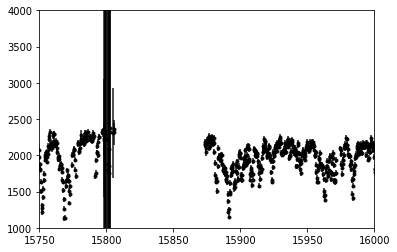

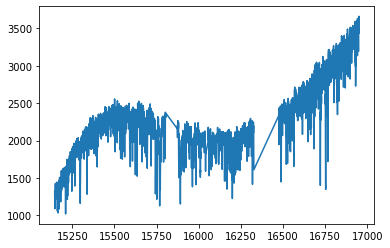

In [24]:
# print(flux.shape,err.shape,lamb.shape)
plt.errorbar(lamb,flux,yerr=err,fmt='.k',zorder=1,alpha=0.9,ms=6)
plt.ylim(1000,4000)
plt.xlim(15750,16000)
plt.show()
plt.plot(lamb,flux)
plt.show()

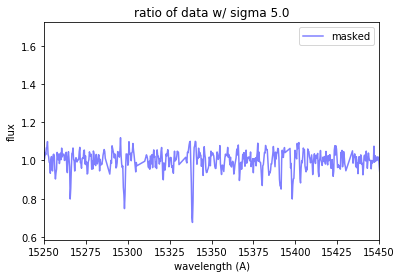

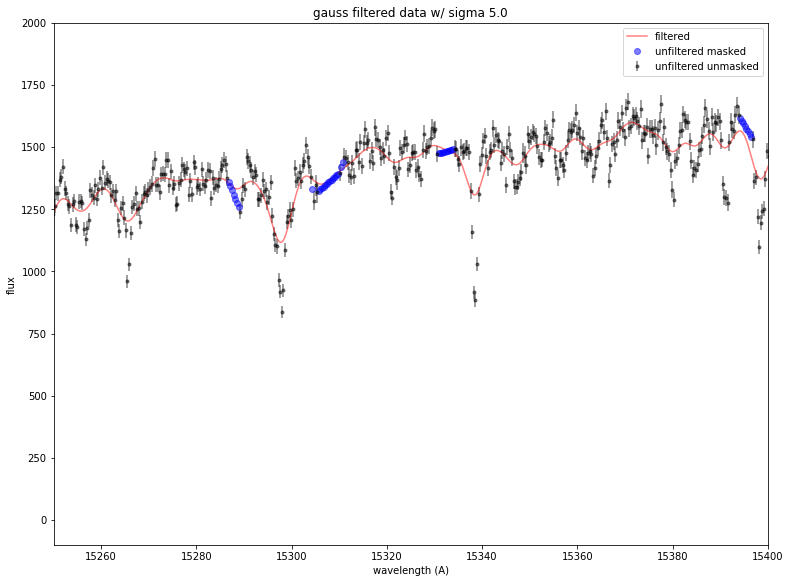

In [79]:
data = tbl[14]

sigma = 5.
gaus_data = scipy.ndimage.gaussian_filter1d(data['flux'],sigma)

gauss_ratio = data['flux']/gaus_data

plt.plot(data['wavelength'][~data['mask']],gauss_ratio[~data['mask']],color='blue',alpha=0.5)
# plt.plot(data['wavelength'][data['mask']] ,data['flux'][data['mask']] ,color='red' ,alpha=0.5)
plt.xlim(15250,15450)
# plt.ylim(0,2000)
plt.legend(['masked','unmasked'])
plt.xlabel('wavelength (A)')
plt.ylabel('flux')
plt.title('ratio of data w/ sigma {}'.format(sigma))
plt.show()

# plt.plot(data['wavelength'][~data['mask']],gaus_data[~data['mask']]   ,color='blue',alpha=0.5)
# plt.plot(data['wavelength'][~data['mask']],data['flux'][~data['mask']],color='red',alpha=0.5)
plt.figure(figsize=[12.8,9.6])
plt.plot(data['wavelength']/u.Angstrom                        ,gaus_data,color='red',alpha=0.5)
plt.errorbar(data['wavelength'][~data['mask']]/u.Angstrom      ,data['flux'][~data['mask']],yerr=data['flux_err'][~data['mask']],fmt='.k',alpha=0.5)
plt.plot(data['wavelength'][data['mask']]/u.Angstrom,data['flux'][data['mask']] ,'bo',alpha=0.5)
plt.xlim(15250,15400)
plt.ylim(-100,2000)
plt.legend(['filtered','unfiltered masked','unfiltered unmasked'])
plt.xlabel('wavelength (A)')
plt.ylabel('flux')
plt.title('gauss filtered data w/ sigma {}'.format(sigma))
plt.show()

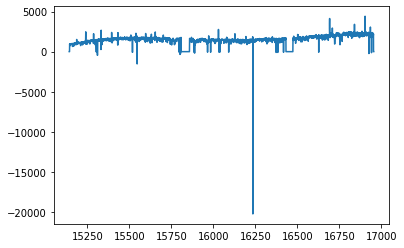

In [26]:
plt.plot(data['wavelength'],data['flux'])

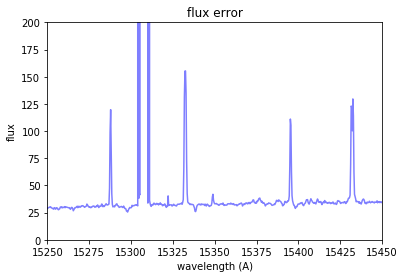

In [27]:
plt.plot(data['wavelength'],data['flux_err'],color='blue',alpha=0.5)
# plt.plot(data['wavelength'][data['mask']] ,data['flux'][data['mask']] ,color='red' ,alpha=0.5)
plt.xlim(15250,15450)
plt.ylim(0,200)
# plt.legend(['error'])
plt.xlabel('wavelength (A)')
plt.ylabel('flux')
plt.title('flux error')
plt.show()

In [82]:
def dataInterp(masks,flux):
    cnt = 0
    new_flux = flux[:]
    for i, mask in enumerate(masks):
        if mask != 0:
            cnt += 1
        if mask == 0 and cnt != 0:
            new_flux[i-cnt:i] = np.linspace(flux[i-cnt-1],flux[i],cnt+2)[1:-1]
            cnt = 0
            
    return new_flux

In [72]:
x = np.linspace(-3,3)
y = x**2
print(y.shape)
# plt.plot(x,y,'o')
masks = (np.zeros(y.shape,dtype=int))

(50,)


In [73]:
masks[12:14] = 1
masks[16:24] = 1

In [74]:
y_corrected = dataInterp(masks,y)

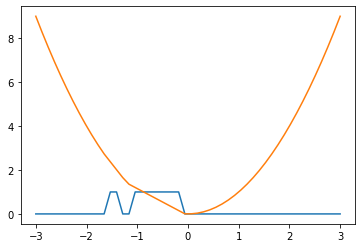

In [75]:

plt.plot(x,masks)
plt.plot(x,y)
# plt.plot(x[masks],y[masks],'.r',alpha=0.5)
# plt.plot(x[~masks],y[~masks],'.b',alpha=0.5)
# plt.plot(x[masks],y_corrected[masks])
plt.show()

In [64]:
x = np.linspace(0,1,10)
print(x.shape)
print(x[1:3])

(10,)
[0.11111111 0.22222222]


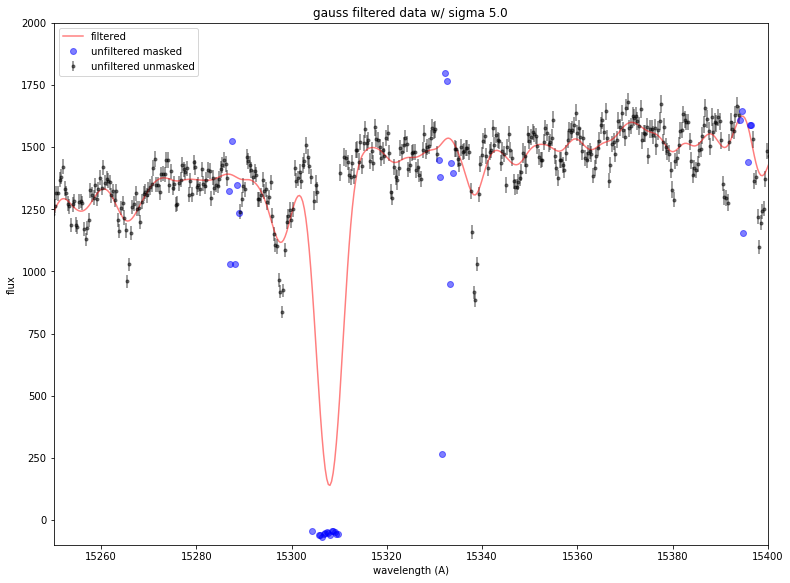

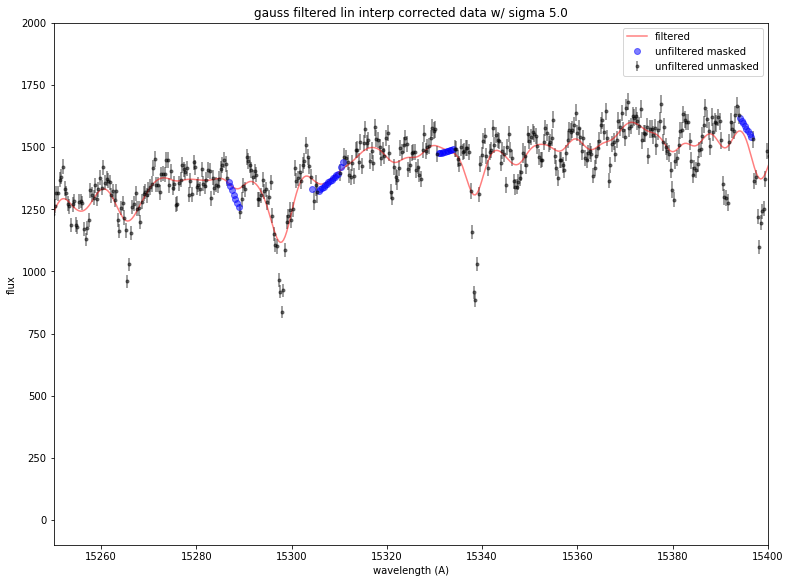

In [85]:
tbl = at.QTable.read('data/hat-p-20.fits')

data = tbl[14]

sigma = 5.
gauss_data = scipy.ndimage.gaussian_filter1d(data['flux'],sigma)

gauss_ratio = data['flux']/gauss_data

plt.figure(figsize=[12.8,9.6])
plt.plot(data['wavelength']/u.Angstrom                   ,gauss_data                 ,color='red',alpha=0.5)
plt.errorbar(data['wavelength'][~data['mask']]/u.Angstrom,data['flux'][~data['mask']],yerr=data['flux_err'][~data['mask']],fmt='.k',alpha=0.5)
plt.plot(data['wavelength'][data['mask']]/u.Angstrom     ,data['flux'][data['mask']] ,'bo',alpha=0.5)
plt.xlim(15250,15400)
plt.ylim(-100,2000)
plt.legend(['filtered','unfiltered masked','unfiltered unmasked'])
plt.xlabel('wavelength (A)')
plt.ylabel('flux')
plt.title('gauss filtered data w/ sigma {}'.format(sigma))
plt.show()

data_corrected = dataInterp(data['mask'],data['flux'])

sigma = 5.
gauss_data = scipy.ndimage.gaussian_filter1d(data_corrected,sigma)

gauss_ratio = data['flux']/gauss_data

plt.figure(figsize=[12.8,9.6])
plt.plot(data['wavelength']/u.Angstrom                        ,gauss_data,color='red',alpha=0.5)
plt.errorbar(data['wavelength'][~data['mask']]/u.Angstrom      ,data['flux'][~data['mask']],yerr=data['flux_err'][~data['mask']],fmt='.k',alpha=0.5)
plt.plot(data['wavelength'][data['mask']]/u.Angstrom,data['flux'][data['mask']] ,'bo',alpha=0.5)
plt.xlim(15250,15400)
plt.ylim(-100,2000)
plt.legend(['filtered','unfiltered masked','unfiltered unmasked'])
plt.xlabel('wavelength (A)')
plt.ylabel('flux')
plt.title('gauss filtered lin interp corrected data w/ sigma {}'.format(sigma))
plt.show()

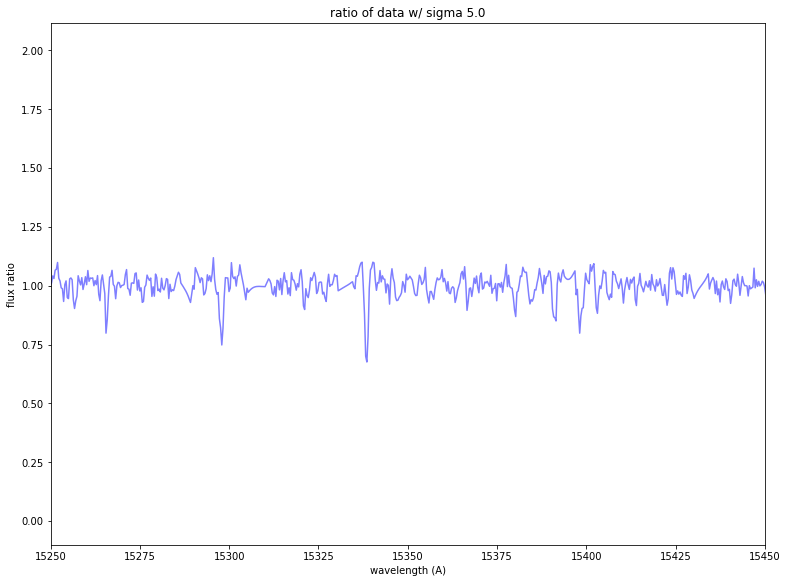

In [89]:
data_corrected = dataInterp(data['mask'],data['flux'])
sigma = 5.
gauss_data = scipy.ndimage.gaussian_filter1d(data_corrected,sigma)

gauss_ratio = data['flux']/gauss_data

plt.figure(figsize=[12.8,9.6])
plt.plot(data['wavelength'],gauss_ratio,color='blue',alpha=0.5)
# plt.plot(data['wavelength'][data['mask']],gauss_ratio[data['mask']],color='blue',alpha=0.5)
plt.xlim(15250,15450)
# plt.ylim(0,2000)
# plt.legend(['masked','unmasked'])
plt.xlabel('wavelength (A)')
plt.ylabel('flux ratio')
plt.title('ratio of data w/ sigma {}'.format(sigma))
plt.show()

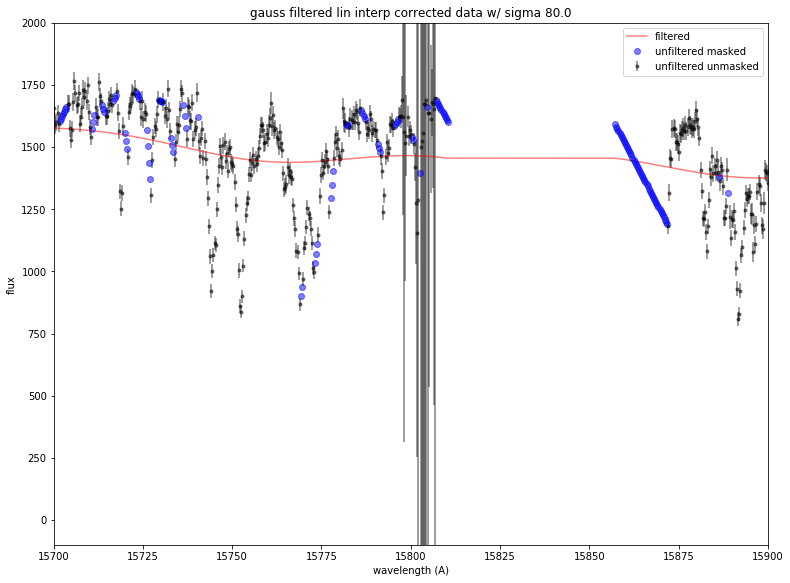

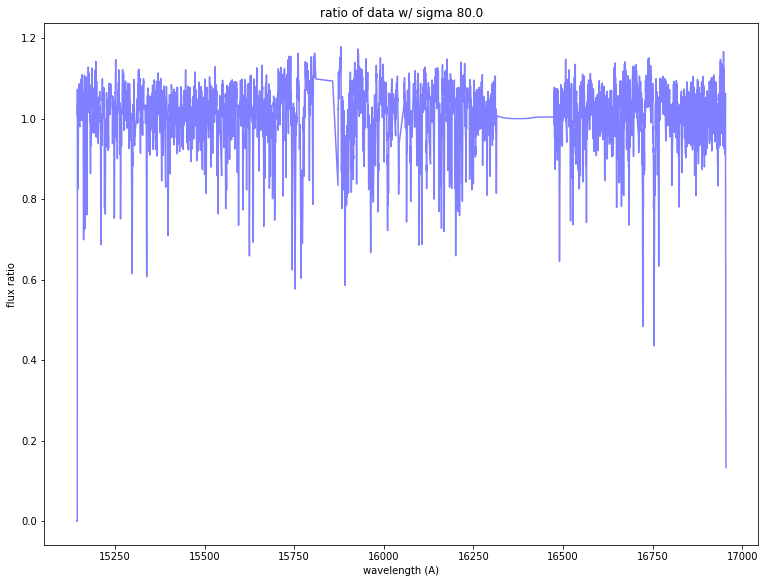

In [101]:
data_corrected = dataInterp(data['mask'],data['flux'])

sigma = 80.
gauss_data = scipy.ndimage.gaussian_filter1d(data_corrected,sigma)

gauss_ratio = data['flux']/gauss_data

plt.figure(figsize=[12.8,9.6])
plt.plot(data['wavelength']/u.Angstrom                   ,gauss_data                 ,color='red',alpha=0.5)
plt.errorbar(data['wavelength'][~data['mask']]/u.Angstrom,data['flux'][~data['mask']],yerr=data['flux_err'][~data['mask']],fmt='.k',alpha=0.5)
plt.plot(data['wavelength'][data['mask']]/u.Angstrom     ,data['flux'][data['mask']] ,'bo',alpha=0.5)
plt.xlim(15300,15500)
plt.ylim(-100,2000)
plt.legend(['filtered','unfiltered masked','unfiltered unmasked'])
plt.xlabel('wavelength (A)')
plt.ylabel('flux')
plt.title('gauss filtered lin interp corrected data w/ sigma {}'.format(sigma))
plt.show()

plt.figure(figsize=[12.8,9.6])
plt.plot(data['wavelength'],gauss_ratio,color='blue',alpha=0.5)
# plt.plot(data['wavelength'][data['mask']],gauss_ratio[data['mask']],color='blue',alpha=0.5)
plt.xlim(15300,15500)
# plt.legend(['masked','unmasked'])
plt.xlabel('wavelength (A)')
plt.ylabel('flux ratio')
plt.title('ratio of data w/ sigma {}'.format(sigma))
plt.show()